In [1]:
#dataframe정렬:sort_values()
#list정렬:list.sort(), sorted(list)
#tuple정렬:sorted(tuple,키)

#정렬:선택,버블,삽입,...(O(n^2))
#퀵,병합,힙(O(nlogn))
#계수(O(m+n))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
df=pd.DataFrame({'s':[1,3,2],
             'name':['choi','kim','lee'],
             'age':[30,20,40]})
df
df.sort_values(by='s')

,s,name,age
0,1,choi,30
2,2,lee,40
1,3,kim,20


In [16]:
df.sort_values(by='s', ascending=False, kind='quicksort', inplace=True)

In [17]:
df

,s,name,age
1,3,kim,20
2,2,lee,40
0,1,choi,30


In [19]:
tp=[(1,'park',30),
    (3,'lee',20),
    (2,'choi',40)
   ]
tp

[(1, 'park', 30), (3, 'lee', 20), (2, 'choi', 40)]

In [22]:
sorted(tp, key=lambda la:la[2])

[(3, 'lee', 20), (1, 'park', 30), (2, 'choi', 40)]

In [23]:
mylist=[0,9,7,2,4]
sorted(mylist)

[0, 2, 4, 7, 9]

In [25]:
mylist.sort()
mylist

[0, 2, 4, 7, 9]

In [28]:
df = pd.DataFrame({'grp': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],  
                           'val': [1, 2, np.nan, 4, np.nan, np.nan, 7, 8, 9]}) 
s = pd.Series([1, 2, np.nan, 4, np.nan, np.nan, 7, 8, 9])
df
s

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
5    NaN
6    7.0
7    8.0
8    9.0
dtype: float64

In [32]:
len(df)
df.shape[0]
len(df.index)

9

In [35]:
len(s)
s.size
len(s.index)

9

In [37]:
df.shape[1]
len(df.columns)

2

In [43]:
df.count()
df['val'].count()
s.count()

df.groupby('grp').size() #NaN 포함한 각 그룹의 행 개수
df.groupby('grp').count()#NaN을 제외한 각 그룹의 행 개수

,val
grp,
A,2
B,1
C,3


In [44]:
s.groupby(df.grp).size() #NaN 포함한 각 그룹의 행 개수
s.groupby(df.grp).count()#NaN을 제외한 각 그룹의 행 개수

grp
A    2
B    1
C    3
dtype: int64

In [46]:
df = pd.DataFrame({'id': ['A_001', 'A_002', 'A_003', 'B_001', 'C_001', 'C_002'],  
                          'val': np.arange(6)})
df

,id,val
0,A_001,0
1,A_002,1
2,A_003,2
3,B_001,3
4,C_001,4
5,C_002,5


In [58]:
#df.id.str.split('_')[0] 0번 인덱스 행 데이터
df['g']=df.id.str.split('_').str[0]
df
type(df.id.str.split('_').str[0])

pandas.core.series.Series

In [59]:
df.id.str.split('_').str[0].tolist()  #series -> list로 변환

['A', 'A', 'A', 'B', 'C', 'C']

In [70]:
for i in range(df.shape[0]):
    #print(df.loc[i,'id'].split('_')[0])
    df.loc[i,'gg']=df.loc[i,'id'].split('_')[0]

In [71]:
df

,id,val,g,gg
0,A_001,0,A,A
1,A_002,1,A,A
2,A_003,2,A,A
3,B_001,3,B,B
4,C_001,4,C,C
5,C_002,5,C,C


In [83]:
s=pd.Series([10,20,30,40,50])
s
s[2]
s[2:]
s[:3]
s[s>=s.mean()]
s[[1,3,4]]

1    20
3    40
4    50
dtype: int64

In [89]:
s=pd.Series([10,20,30,40,50], index=['a','b','c','d','e'])
s.ix['c']
s.ix[['a','c']]
s.get(['a','c'])
s['b']=200
s

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


a     10
b    200
c     30
d     40
e     50
dtype: int64

In [91]:
#d 인덱스 존재여부
'd' in s

True

In [100]:
# df=DataFrame(데이터, index=[...], columns=[...])
# df[['c1','c2']]
# df['new_c']=df['c1']-df['c2']
#df.assign(newc=df['c1']*df['c2'])
df=pd.DataFrame({'c1':[1,3], 'c2':[2,4]})
df
df=df.assign(c3=df['c1']*df['c2'])
df
#데이터프레임 컬럼 삭제
#del df[열이름], df.drop([열이름],1)
df.drop(['c3'],1)
df

,c1,c2,c3
0,1,2,2
1,3,4,12


In [103]:
del df['c3']

KeyError: 'c3'

In [104]:
df

,c1,c2
0,1,2
1,3,4


In [109]:
df['c1']
df.c1
df.iloc[0]

c1    1
c2    2
Name: 0, dtype: int64

In [110]:
#텍스트 -> 단어로 분리 -> 단어 단위 원핫 인코딩
#How be you
#What be you name
#How 1 1000000
#are 2 0100000

In [123]:
file_opened=open('python_wikipedia.txt')
file_opened
for line in file_opened.readlines():
    print(line)
#전처리(소문자, stopword, 컴마,대괄호,특수문자.., 숫자)
def word_preprocess(word):
    word=word.lower()
    stop_words = ['a', 'an', 'the', 'in', 'with', 'to', 'for', 'from', 'of', 'at', 'on', 'until', 'by', 'and', 'but', 'is', 'are', 'was', 'were', 'it', 'that', 'this', 'my', 'his', 'her', 'our', 'as', 'not'] # make your own list
    symbols = [',', '.', ':', '-', '+', '/', '*', '&', '%', '[', ']', '(', ')'] # make your own list
    for stop_word in stop_words:
        if word != stop_word:
            word=word
        else:
            word=''
    for symbol in symbols:
        word=word.replace(symbol, '')
        
    return word

Python programming language, from wikipedia

Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aims to help programmers write clear, logical code for small and large-scale projects.[26]

Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.[27]

Python was conceived in the late 1980s as a successor to the ABC language. Python 2.0, released 2000, introduced features like list comprehensions and a garbage collection system capable of collecting reference cycles. Python 3.0, released 2008, was a major revision of the language that is not completel

In [133]:
token_inx={}
file_opened=open('python_wikipedia.txt')
for line in file_opened.readlines():
    #공백 제거
    line=line.strip()
    #print(line)
    for word in line.split():
        word=word_preprocess(word)
        if word not in token_inx:#word가 토큰딕셔너리에 없다면
            if word != '':
#                token_inx[word]=len(token_inx)+1
                token_inx[word]=1
        else:
            token_inx[word]=token_inx[word]+1
print(token_inx)
        #print(word)
#{python:200, programming:50, ...}

{'python': 14, 'programming': 4, 'language': 7, 'wikipedia': 1, 'interpreted': 1, 'highlevel': 1, 'generalpurpose': 1, 'created': 1, 'guido': 2, 'van': 2, 'rossum': 2, 'first': 1, 'released': 3, '1991': 1, "python's": 1, 'design': 1, 'philosophy': 1, 'emphasizes': 1, 'code': 4, 'readability': 1, 'its': 3, 'notable': 1, 'use': 1, 'significant': 1, 'whitespace': 1, 'constructs': 1, 'objectoriented': 2, 'approach': 1, 'aims': 1, 'help': 1, 'programmers': 2, 'write': 1, 'clear': 1, 'logical': 1, 'small': 1, 'largescale': 1, 'projects26': 1, 'dynamically': 1, 'typed': 1, 'garbagecollected': 1, 'supports': 1, 'multiple': 1, 'paradigms': 1, 'including': 1, 'procedural': 1, 'functional': 1, 'often': 1, 'described': 1, '"batteries': 1, 'included"': 1, 'due': 2, 'comprehensive': 1, 'standard': 1, 'library27': 1, 'conceived': 1, 'late': 1, '1980s': 1, 'successor': 1, 'abc': 1, '20': 1, '2000': 1, 'introduced': 1, 'features': 1, 'like': 1, 'list': 1, 'comprehensions': 1, 'garbage': 1, 'collection'

In [136]:
np.random.normal(5, size=3)

array([5.16905752, 5.39471071, 5.18588656])

In [137]:
np.random.seed(708)
np.random.normal(size=10)

array([-0.44701866,  0.42271748,  0.35076078, -0.15413394, -1.5020158 ,
        1.30307833,  1.00748836,  0.06666045, -1.47430939, -0.39288867])

In [ ]:
#binomial: 이항분포로부터 무작위 표본추출
#이산형/연속형 확률 분포
#이산형(이항, 포아송)
#연속형(정규, t분포, 균등, f, 카이제곱 등)
#성공(1), 실패(0)
#성공확률을 p, 베르누이 시행을 n번 수행, 성공하는  횟수를 X라하면
#"확률변수 X는 모수 n과 p인 이항분포를 따른다" 라고 표현
#f(x)=nCx p^x (1-p)^n-x ,   x=0,1,...,n


In [146]:
sum(np.random.binomial(n=1, p=0.5, size=20)==1)/20
#np.random.normal(mu, sigma, size)
np.random.normal(0, 3, 100)
#평균, 분산, 표준편차

array([-3.19659911, -2.60323721,  5.70770909,  0.44529294, -1.47165341,
        1.04946025, -2.92620596, -4.05711391,  3.59767666, -0.70482313,
        0.16450095, -3.55305022, -1.2734477 ,  1.3068119 ,  0.04167202,
        4.64626834, -1.87784424,  5.44095893, -0.57497828,  1.44328395,
       -0.52102529, -3.46583433,  4.76419383, -0.22572733,  1.7283394 ,
        3.4568335 , -0.59012674,  2.84735977,  2.5983469 , -2.62322573,
        2.87140156, -0.13954999, -1.67772842,  1.65308791, -3.09652696,
       -5.94787916,  1.5468988 , -2.96561477,  3.75211319, -2.16183569,
        3.30227857,  5.54994728,  0.00965777,  1.43118019, -0.65828566,
        1.57570122,  3.83560863, -3.73311937, -1.23702719, -0.17162565,
       -1.21871815,  0.74263158,  1.41697653,  1.33567372,  0.01947328,
       -0.05232609,  2.69348564,  0.41810477,  2.32815436, -0.07852671,
       -2.30229157, -1.6237077 , -3.22200467,  5.56749007,  1.89559537,
        3.70214074,  3.67428126, -1.75954728, -1.25493346, -0.16

In [156]:
visited=pd.read_csv("data/survey_visited.csv")
visited
survey=pd.read_csv("data/survey_survey.csv")
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [157]:
vs=visited.merge(survey, left_on='ident', right_on='taken')
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [161]:
from numpy import NaN, NAN, nan
num_legs=pd.Series({"goat":4, "amoeba":nan})
num_legs

goat      4.0
amoeba    NaN
dtype: float64

In [163]:
gapminder=pd.read_csv("data/gapminder.tsv", sep="\t")
gapminder
life_exp=gapminder.groupby(['year'])['lifeExp'].mean()
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [165]:
life_exp.loc[range(2000,2010), ]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
2008          NaN
2009          NaN
Name: lifeExp, dtype: float64

In [169]:
life_exp[life_exp.index>2000]

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [170]:
ebola=pd.read_csv("data/country_timeseries.csv")

In [178]:
ebola.columns
ebola.info()
num_missing=ebola.shape[0]-ebola.count()
num_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [192]:
np.count_nonzero(ebola['Cases_Guinea'].isnull())

ebola.Cases_Guinea.value_counts(dropna=False)

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
506.0      1
812.0      1
771.0      1
648.0      1
607.0      1
579.0      1
543.0      1
519.0      1
510.0      1
2597.0     1
2769.0     1
899.0      1
2571.0     1
485.0      1
472.0      1
460.0      1
427.0      1
415.0      1
861.0      1
942.0      1
936.0      1
1667.0     1
2706.0     1
2416.0     1
2292.0     1
          ..
1519.0     1
151.0      1
1199.0     1
143.0      1
127.0      1
122.0      1
103.0      1
49.0       1
2695.0     1
2730.0     1
208.0      1
218.0      1
408.0      1
412.0      1
413.0      1
398.0      1
351.0      1
344.0      1
328.0      1
291.0      1
281.0      1
258.0      1
248.0      1
233.0      1
236.0      1
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64

In [195]:
ebola.fillna(0).iloc[0:10,0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [196]:
ebola.fillna(method='ffill') #bfill

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,8018.0,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,3423.0,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,1697.0,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,7977.0,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,3413.0,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [198]:
ebola.shape
ebola_dropna=ebola.dropna()
ebola_dropna

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [201]:
ebola.columns
ebola['Cases_multiple']=ebola['Cases_Guinea']+ebola['Cases_Liberia']+ebola['Cases_SierraLeone']
ebola_subset=ebola.loc[:, ['Cases_Guinea','Cases_Liberia','Cases_SierraLeone','Cases_multiple']]

In [205]:
ebola_subset
ebola.Cases_Guinea.sum(skipna=True)

84729.0

In [206]:
ebola.Cases_Guinea.sum(skipna=False)

nan

In [208]:
pew=pd.read_csv("data/pew.csv")
pew
pew.iloc[:,0:6]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k
0,Agnostic,27,34,60,81,76
1,Atheist,12,27,37,52,35
2,Buddhist,27,21,30,34,33
3,Catholic,418,617,732,670,638
4,Don’t know/refused,15,14,15,11,10
5,Evangelical Prot,575,869,1064,982,881
6,Hindu,1,9,7,9,11
7,Historically Black Prot,228,244,236,238,197
8,Jehovah's Witness,20,27,24,24,21
9,Jewish,19,19,25,25,30


In [211]:
pd.melt(pew, id_vars='religion')
#religion컬럼을 기준으로 피봇한 상태

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [214]:
pew_long=pd.melt(pew, id_vars='religion', 
                 var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [223]:
billboard=pd.read_csv("data/billboard.csv")
#billboard.info()
#billboard.iloc[0:5, 0:16]
pd.melt(billboard, id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name='rating')

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [232]:
ebola.columns
ebola.iloc[:5, [0,1,2,3,10,11]]
ebola_long=pd.melt(ebola, id_vars=['Date','Day'])
variable_split=ebola_long.variable.str.split("_")
type(variable_split)
type(variable_split[0])

list

In [240]:
status_value=variable_split.str.get(0)
country_value=variable_split.str.get(1)
status_value[-5:]
country_value[-5:]

2069    multiple
2070    multiple
2071    multiple
2072    multiple
2073    multiple
Name: variable, dtype: object

In [ ]:
#concat, split 응용
#ebola데이터를
#Date Day variable     value status country.stataus
#날짜 ...  Cases_국가 2000   Cases        국가명

In [259]:
weather=pd.read_csv("data/weather.csv")
#weather.info()
weather.iloc[:5, :11]

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN


In [262]:
weather_melt=pd.melt(weather, id_vars=['id','year','month','element'],
       var_name='day', value_name='temp')
weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
5,MX17004,2010,3,tmin,d1,NaN
6,MX17004,2010,4,tmax,d1,NaN
7,MX17004,2010,4,tmin,d1,NaN
8,MX17004,2010,5,tmax,d1,NaN
9,MX17004,2010,5,tmin,d1,NaN


In [263]:
weather_t=weather_melt.pivot_table(
index=['id', 'year', 'month', 'day'],
    columns='element',
    values='temp'
)

In [264]:
weather_t

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [265]:
weather_t.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [277]:
billboard
billboard_long=pd.melt(billboard, id_vars=['year','artist',
                                           'track','time',
                                           'date.entered'],
       var_name='week', value_name='rating')
billboard_long.shape
billboard_long[billboard_long.track=="Loser"]

billboard_songs=billboard_long[['year','artist','track','time']]
billboard_songs.shape

(24092, 4)

In [282]:
billboard_songs=billboard_songs.drop_duplicates()
billboard_songs.shape
billboard_songs
billboard_songs['id']=range(len(billboard_songs))
billboard_songs

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
5,2000,98^0,Give Me Just One Nig...,3:24,5
6,2000,A*Teens,Dancing Queen,3:44,6
7,2000,Aaliyah,I Don't Wanna,4:15,7
8,2000,Aaliyah,Try Again,4:03,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,9


In [283]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [284]:
billboard_ratings=billboard_long.merge(billboard_songs, 
                     on=['year', 'artist', 'track','time'])
billboard_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
5,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk6,94.0,0
6,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk7,99.0,0
7,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk8,NaN,0
8,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk9,NaN,0
9,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk10,NaN,0


In [300]:
import os
import urllib.request
with open("data/raw_data_urls.txt","r") as data_urls:
    for line, url in enumerate(data_urls):
        if line==2:
            break
        fn=url.split("/")[-1].strip()
        print(url)
        fp=os.path.join('','./data',fn) #
        urllib.request.urlretrieve(url, fp)
        
#https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv        
     #   print(url)
    #print(data_urls)


https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv



In [303]:
import glob
nyc_taxi_data=glob.glob('./data/fhv_*')

In [307]:
taxi1=pd.read_csv(nyc_taxi_data[0])
taxi2=pd.read_csv(nyc_taxi_data[1])
taxi2.head()

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-02-01 00:00:00,NaN
1,B00013,2015-02-01 00:01:00,NaN
2,B00013,2015-02-01 00:21:00,NaN
3,B00013,2015-02-01 01:00:00,NaN
4,B00013,2015-02-01 02:10:00,NaN


In [310]:
taxi1.shape
taxi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746033 entries, 0 to 2746032
Data columns (total 3 columns):
Dispatching_base_num    object
Pickup_date             object
locationID              float64
dtypes: float64(1), object(2)
memory usage: 62.9+ MB


In [311]:
taxi2.shape
taxi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126401 entries, 0 to 3126400
Data columns (total 3 columns):
Dispatching_base_num    object
Pickup_date             object
locationID              float64
dtypes: float64(1), object(2)
memory usage: 71.6+ MB


In [313]:
taxi=pd.concat([taxi1,taxi2])
taxi.shape

(5872434, 3)

In [314]:
list_taxi_df=[]
for fn in nyc_taxi_data:
    df=pd.read_csv(fn)
    list_taxi_df.append(df)
print(len(list_taxi_df))

2


In [318]:
type(list_taxi_df[0])
taxi_con=pd.concat(list_taxi_df)
taxi_con.shape

(5872434, 3)

In [319]:
taxi.equals(taxi_con)

True

In [320]:
#시각화

SyntaxError: invalid syntax (<ipython-input-320-4b37ef281455>, line 1)

In [322]:
iris=sns.load_dataset("iris")
iris.shape
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


(array([0.05555556, 0.16666667, 0.22222222, 0.16666667, 0.44444444,
        0.77777778, 0.77777778, 0.55555556, 1.44444444, 0.61111111,
        1.05555556, 0.66666667, 0.33333333, 0.22222222, 0.5       ,
        0.11111111, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

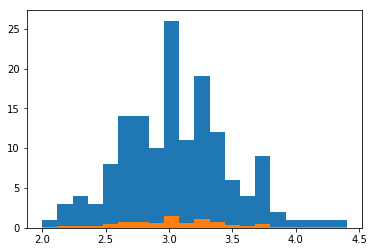

In [326]:
iris.groupby('species').size()
plt.hist(iris['sepal_width'], bins=20)


(array([0.05555556, 0.16666667, 0.22222222, 0.16666667, 0.44444444,
        0.77777778, 0.77777778, 0.55555556, 1.44444444, 0.61111111,
        1.05555556, 0.66666667, 0.33333333, 0.22222222, 0.5       ,
        0.11111111, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

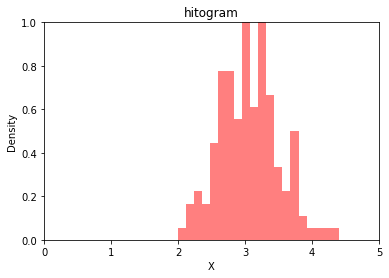

In [336]:
plt.xlabel('X')
plt.ylabel('Density')
plt.title('hitogram')
plt.axis([0,5,0,1])
plt.hist(iris['sepal_width'], bins=20, density=True, facecolor='red', alpha=0.5)


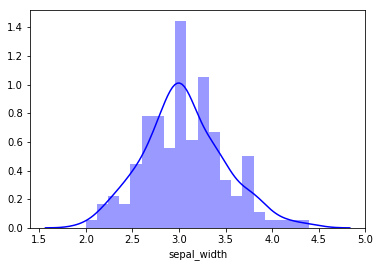

In [341]:
sns.distplot(iris['sepal_width'], 
             color='blue', kde=True, bins=20)